In [62]:
import numpy as np
import sympy as sp
import mpmath as mp
import math as mt
import time 
from matplotlib import pyplot as plt

In [105]:
def getDots(solution : list, xs : list) -> list:
    fun = lambda i, x : (x ** i) * (1 - x ** 2)
    ans = []
    mx = 0
    for i in xs:
        sm = 0
        for j in range(len(solution)):
            sm += (solution[j] * fun(j,i))
        ans.append([i,sm])
        mx = max(sm,mx)
    return (ans,mx)

def pointsGenerator(a : int,b : int, counter : int) -> list:
    step = (b - a) / counter
    points = [a] * counter
    for i in range(1,counter):
        points[i] = points[i - 1] + step
    points.append(b)
    return points

def collocation_method(n : int, values : list, func1 = 1, func2 = 1):
    x = sp.Symbol('x')
    i = sp.Symbol('i')
    tmp = x ** i * (1 - x ** 2)
    exp = sp.lambdify((x,i), func1 * sp.diff(tmp,x,x) + (1 + func2 * x ** 2) * tmp )
    matrix = np.zeros(shape = (n,n))
    b = [-1] * n
    for i in range(n):
        for j in range(n):
            matrix[i][j] = exp(values[i],j)
    return np.linalg.solve(matrix,b)

def galerkin_method(n : int, func1 = 1, func2 = 1):
    x = sp.Symbol('x')
    i1 = sp.Symbol('i1')
    i2 = sp.Symbol('i2')
    i3 = sp.Symbol('i3')
    tmp = x ** i1 * (1 - x ** 2)
    base = x ** i2 * (1 - x ** 2)
    cur = x ** i3 * (1 - x ** 2)
    tmp_exp = func1 * sp.diff(tmp,x,x) + (1 + func2 * x ** 2) * tmp
    aexp = sp.lambdify((x,i1,i2), tmp_exp * base)
    bexp = sp.lambdify((x,i3), cur * -1)
    points = np.linspace(-1,1,70)
    matrix = np.zeros(shape = (n,n))
    b = [0] * n
    for i in range(n):
        for j in range(n):
            matrix[i][j] = np.trapz(np.array([aexp(t,j,i) for t in points]))
        b[i] = np.trapz(np.array([bexp(t,i) for t in points]))
    return np.linalg.solve(matrix,b)

def minSquares(n : int, a : float, b : float, func1 = 1, func2 = 1):
    system = []
    clist = [sp.Symbol('c' + str(i)) for i in range(n)]
    x = sp.Symbol('x')
    tmp = [clist[i] * (x ** i) * (1 - x ** 2) for i in range(n)]
    y1 = tmp[0]
    for i in range(1,n):
        y1 += tmp[i]
    y2 = y1.diff(x)
    eq = func1 * y2.diff(x) + (1 + func2 * x ** 2) * y1 + 1
    S = 0
    points = pointsGenerator(a,b,n+1)
    tmp = sp.lambdify(sp.Symbol('x'), eq, "sympy")
    for i in range(n + 1):
        S += tmp(points[i]) ** 2
    R = []
    for i in range(n):
        cur = sp.Poly(S.diff(sp.Symbol('c' + str(i)))).coeffs()
        R.append(-(cur[-1]))
        cur.pop(-1)
        system.append(cur)
    R = np.array(R,dtype='float')
    L = np.array(system,dtype='float')
    solution = np.linalg.solve(L,R)
    dots,mx = getDots(solution,points)
    print(mx)
    return dots
    
def draw(res, counter : int, a : int, b : int):
    points = np.linspace(a,b,counter)
    dots, mx = getDots(res,points)
    print(mx)
    p = np.array(dots)
    x,y = p.T
    plt.plot(x,y)
    plt.show()
    
def draw2(dots):
    p = np.array(dots)
    x,y = p.T
    plt.plot(x,y)
    plt.show()

0.855431804580721


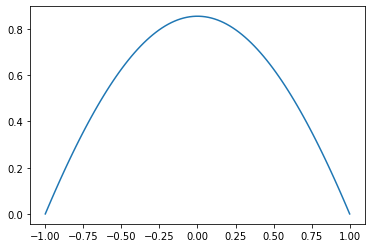

0.22654962539672852


In [106]:
st = time.time()
draw(collocation_method(100,pointsGenerator(-1,1, 100), np.sin(8), np.cos(8)), 100, -1, 1)
end = time.time()
print(end - st)

0.8552995591822254


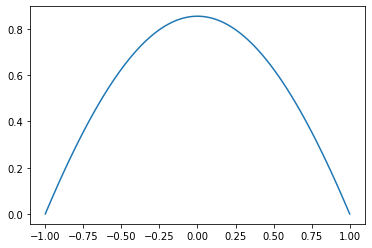

3.90303635597229


In [107]:
st = time.time()
draw(galerkin_method(100, np.sin(8), np.cos(8)),100,-1,1)
end = time.time()
print(end - st)

0.8534015904800549


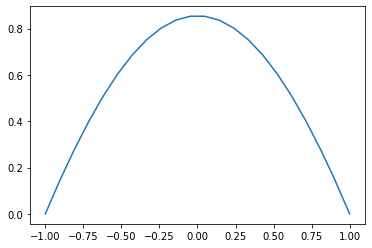

6.781515121459961


In [115]:
st = time.time()
draw2(minSquares(20,-1,1,np.sin(8), np.cos(8)))
end = time.time()
print(end - st)